# NHL Draft dataset
# Exploratory data analysis
# Records: 
## Most Goals by a Rookie in a Single Season
This notebook presents Exploratory Data Analysis performed on NHL Records data obtained from NHL Records API Records endpoint.
### Data collection summary
Dataset generated from a JSON received from the NHL Records API, contains response to the request for all draft records.

For details, see notebook `notebooks/feature_extraction/nhl_api.ipynb`.

## Preparations
### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import os

os.chdir('Documents/repos/nhl_draft/') # might need to comment this out

from src.io_utils import csv_to_df_rec
from src.plot_utils import plot_regplot

sns.set()
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.idea',
 'data',
 'img',
 'main.py',
 'methodology',
 'models',
 'notebooks',
 'README.md',
 'reports',
 'requirements.txt',
 'src']

### Load data

In [2]:
rec_name = 'most-goals-rookie-one-season'
suffix = '_new_cols'
df, name = csv_to_df_rec(rec_name, suffix)

----- NHL Records
--- Most Goals, Rookie, Season 

----- DataFrame with NHL Records Data loaded
in 0.07 seconds
with 3,377 rows
and 62 columns
-- Column names:
 Index(['activePlayer', 'assists', 'assistsPerGpMin20', 'firstGoals',
       'firstName', 'fiveGoalGames', 'fourGoalGames', 'gameWinningGoals',
       'gamesInSchedule', 'gamesPlayed', 'goals', 'goalsPerGpMin20',
       'goalsPerGpMin50', 'id', 'lastName', 'overtimeAssists', 'overtimeGoals',
       'overtimePoints', 'penalties', 'penaltyMinutes', 'playerId', 'points',
       'pointsPerGpMin50', 'positionCode', 'powerPlayGoals', 'rookieFlag',
       'seasonId', 'sevenGoalGames', 'shorthandedGoals', 'shots',
       'sixGoalGames', 'teamAbbrevs', 'teamNames', 'threeGoalGames',
       'threeOrMoreGoalGames', 'assists_norm', 'firstGoals_norm',
       'gameWinningGoals_norm', 'gamesPlayed_norm', 'goals_norm',
       'overtimeGoals_norm', 'overtimePoints_norm', 'penalties_norm',
       'penaltyMinutes_norm', 'points_norm', 'powerPlayGo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 62 columns):
activePlayer             3377 non-null bool
assists                  3377 non-null int64
assistsPerGpMin20        731 non-null float64
firstGoals               3377 non-null int64
firstName                3377 non-null object
fiveGoalGames            308 non-null float64
fourGoalGames            308 non-null float64
gameWinningGoals         3377 non-null int64
gamesInSchedule          3377 non-null int64
gamesPlayed              3377 non-null int64
goals                    3377 non-null int64
goalsPerGpMin20          340 non-null float64
goalsPerGpMin50          4 non-null float64
id                       3377 non-null int64
lastName                 3377 non-null object
overtimeAssists          3377 non-null int64
overtimeGoals            3377 non-null int64
overtimePoints           3377 non-null int64
penalties                3377 non-null int64
penaltyMinutes           3377 non-

## Distribution of points

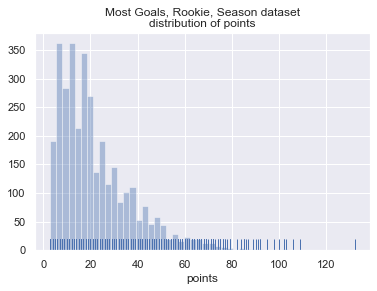

In [4]:
stat = 'points'
ax = sns.distplot(df[stat], kde=False, rug=True)
ax.set_title(name + ' dataset'
             '\ndistribution of ' + stat);

## Assists directly contribute to points
As expected, there appears to be a **_strong positive correlation_** between the number of **assists** and the number of **points** a player has, as assists are directly counted towards points.

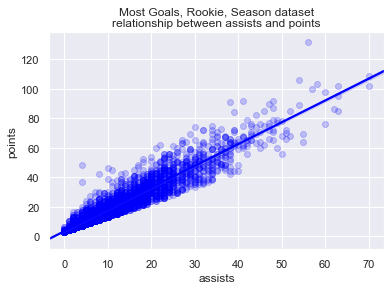

In [5]:
stat1 = 'assists'
stat2 = 'points'
plot_regplot(df, stat1, stat2, name=name, alpha=0.2)

## He shoots, he scores!
As expected, there is a **_moderate positive correlation_** between **shots** and **goals**, and **shots** and **assists**.

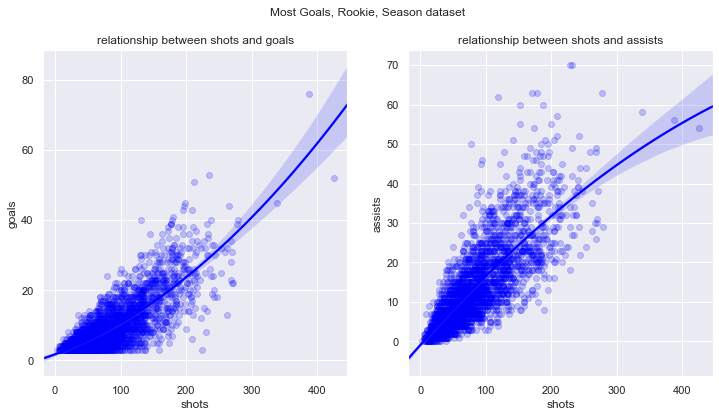

In [6]:
stat1 = 'shots'
stat2 = 'goals'
stat3 = 'assists'
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
f.suptitle(name + " dataset")
plot_regplot(df, stat1, stat2, name=name, alpha=0.2, suptitle=False,
             create_figure=False, ax=axes[0], show_plot=False,
             order=2)
plot_regplot(df, stat1, stat3, name=name, alpha=0.2, suptitle=False,
             create_figure=False, ax=axes[1], show_plot=True,
             order=2)

## Weaker relationship between goals and assists

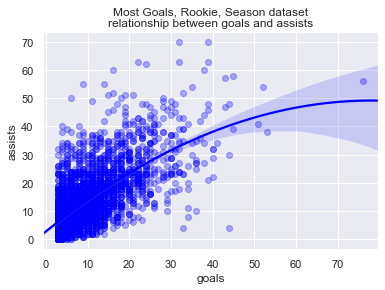

In [7]:
stat1 = 'goals'
stat2 = 'assists'
plot_regplot(df, stat1, stat2, name=name, alpha=0.3, order=2)

## You have to stay out of the box...
Players with the highest number of goals generally have a lower number of penalties and penalty minutes. Players with the highest number of penalties and penalty minutes rarely have the a high number of goals.

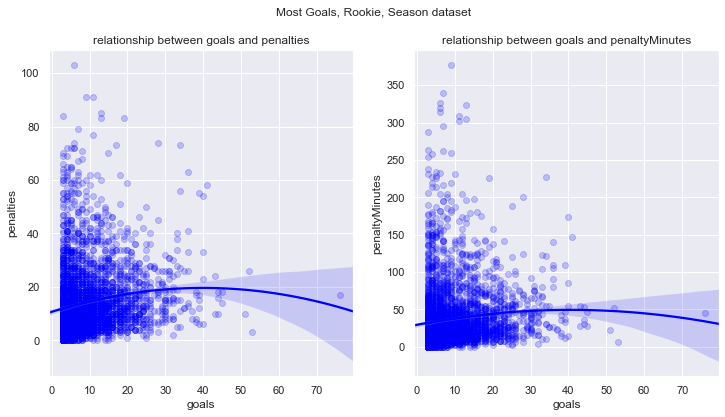

In [8]:
stat1 = 'goals'
stat2 = 'penalties'
stat3 = 'penaltyMinutes'
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
f.suptitle(name + " dataset")
plot_regplot(df, stat1, stat2, name=name, alpha=0.2, suptitle=False,
             create_figure=False, ax=axes[0], show_plot=False,
             order=2)
plot_regplot(df, stat1, stat3, name=name, alpha=0.2, suptitle=False,
             create_figure=False, ax=axes[1], show_plot=True,
             order=2)

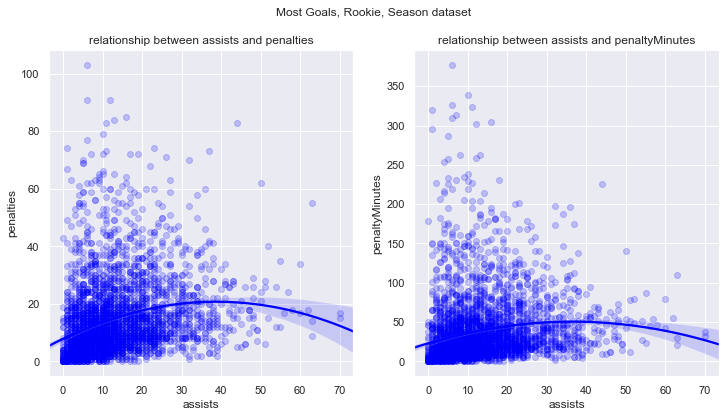

In [9]:
stat1 = 'assists'
stat2 = 'penalties'
stat3 = 'penaltyMinutes'
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
f.suptitle(name + " dataset")
plot_regplot(df, stat1, stat2, name=name, alpha=0.2, suptitle=False,
             create_figure=False, ax=axes[0], show_plot=False,
             order=2)
plot_regplot(df, stat1, stat3, name=name, alpha=0.2, suptitle=False,
             create_figure=False, ax=axes[1], show_plot=True,
             order=2)

## Goals scored by position
As expected, defencemen score much less goals on average than forwards.

C    1004
L     865
R     843
D     665
Name: positionCode, dtype: int64

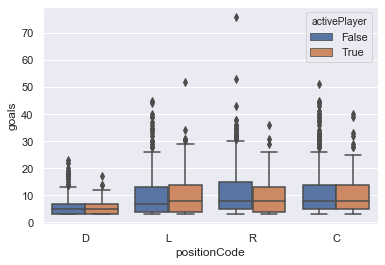

In [10]:
stat1 = 'positionCode'
stat2 = 'goals'
stat3 = 'activePlayer'
pos_order = ["D", "L", "R", "C"]
sns.boxplot(data=df, x=stat1, y=stat2,
            order=pos_order, hue=stat3);
df['positionCode'].value_counts()

## Correlations between variables
### Colored by position

In [ ]:
cols = ['activePlayer', 'assists', 'firstGoals', 'gameWinningGoals', 
        'gamesPlayed', 'goals', 'overtimeAssists', 'overtimeGoals', 
        'overtimePoints', 'penalties', 'penaltyMinutes', 'points', 
        'pointsPerGpMin50', 'positionCode', 'rookieFlag', 'shots']
sns_pairgrid = sns.pairplot(df[cols], kind='scatter', hue='positionCode',
                            markers=['o', 's', 'x', 'D'], palette='Set2')
save_path = 'img/' + rec_name + '_pairplot.png'
fig = sns_pairgrid.fig
fig.savefig(save_path, dpi=300)
plt.close(fig)
print("Plot saved to file", save_path)

### Colored by defencemen/forward

In [4]:
cols = ['activePlayer', 'assists', 'firstGoals', 'gameWinningGoals', 
        'gamesPlayed', 'goals', 'overtimeAssists', 'overtimeGoals', 
        'overtimePoints', 'penalties', 'penaltyMinutes', 'points', 
        'def', 'shots']
sns_pairgrid = sns.pairplot(df[cols], kind='scatter', hue='def',
                            markers=['x', '+'], palette='Set2')
save_path = 'img/' + rec_name + '_def_pairplot.png'
fig = sns_pairgrid.fig
fig.savefig(save_path, dpi=300)
plt.close(fig)
print("Plot saved to file", save_path)


C:\Anaconda3\envs\nhl_draft\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda3\envs\nhl_draft\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\envs\nhl_draft\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Plot saved to file img/most-goals-rookie-one-season_def_pairplot.png
